In [3]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_horror = pd.read_csv("../CombinedBooks.csv")
df_horror.head()

,Title,Author,Rating,Raters,Genres
0,Sh*t My Dad Says (Hardcover),Justin Halpern,3.98,153387,"Humor,Nonfiction,Autobiography,Humor,Biography..."
1,The Glove of Darth Vader (Star Wars: Jedi Prin...,Paul Davids,2.77,894,"Media Tie In,Science Fiction,Fiction,Young Adu..."
2,The Divine Comedy (Hardcover),Dante Alighieri,4.07,138595,"Classics,Poetry,Fiction,Literature,Philosophy,..."
3,"The ​Crown of Gilded Bones (Blood and Ash, #3)",Jennifer L. Armentrout,4.23,171209,"Fantasy,Romance,New Adult,Romance,Paranormal,F..."
4,Fahrenheit 451 (Kindle Edition),Ray Bradbury,3.97,2120617,"Classics,Fiction,Science Fiction,Science Ficti..."


In [5]:
minRaters=min(df_horror.Raters)
maxRaters=max(df_horror.Raters)
meanRaters=df_horror.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8923083
Mean Raters : 314578.0660643704


In [6]:
#rating class column
conditions  = [ df_horror.Rating >= 4, (df_horror.Rating < 4) & (df_horror.Rating> 2), (df_horror.Rating <= 2) ]
choices     = [ "good", 'mediocre', 'bad' ]
df_horror["rating_class"] = np.select(conditions, choices, default="bad")
#rater class column
conditions  = [ df_horror.Raters >= 25000, (df_horror.Raters < 25000) & (df_horror.Raters> 1000), (df_horror.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_horror["raters_class"] = np.select(conditions, choices, default="small")

df_horror['worth_reading']=np.where(((df_horror.rating_class == "mediocre") & (df_horror.raters_class == "large"))|((df_horror.rating_class == "good") & ((df_horror['raters_class'] == "large")|(df_horror["raters_class"] =="medium"))) ,'yes','no')

In [7]:
df_horror.head()

,Title,Author,Rating,Raters,Genres,rating_class,raters_class,worth_reading
0,Sh*t My Dad Says (Hardcover),Justin Halpern,3.98,153387,"Humor,Nonfiction,Autobiography,Humor,Biography...",mediocre,large,yes
1,The Glove of Darth Vader (Star Wars: Jedi Prin...,Paul Davids,2.77,894,"Media Tie In,Science Fiction,Fiction,Young Adu...",mediocre,small,no
2,The Divine Comedy (Hardcover),Dante Alighieri,4.07,138595,"Classics,Poetry,Fiction,Literature,Philosophy,...",good,large,yes
3,"The ​Crown of Gilded Bones (Blood and Ash, #3)",Jennifer L. Armentrout,4.23,171209,"Fantasy,Romance,New Adult,Romance,Paranormal,F...",good,large,yes
4,Fahrenheit 451 (Kindle Edition),Ray Bradbury,3.97,2120617,"Classics,Fiction,Science Fiction,Science Ficti...",mediocre,large,yes


In [8]:
#split dataset in features and target variable
feature_cols=['Rating','rating_class','raters_class', "Raters"]
X = df_horror[feature_cols] # Features
y = df_horror['worth_reading'] # Target variable

print(X)
print(y)

      Rating rating_class raters_class   Raters
0       3.98     mediocre        large   153387
1       2.77     mediocre        small      894
2       4.07         good        large   138595
3       4.23         good        large   171209
4       3.97     mediocre        large  2120617
...      ...          ...          ...      ...
1766    4.08         good        large    79087
1767    2.78     mediocre       medium     1104
1768    4.26         good        large   378150
1769    4.19         good        large  1037641
1770    4.02         good        large   138559

[1771 rows x 4 columns]
0       yes
1        no
2       yes
3       yes
4       yes
       ... 
1766    yes
1767     no
1768    yes
1769    yes
1770    yes
Name: worth_reading, Length: 1771, dtype: object


In [9]:
X=pd.get_dummies(X)
X

,Rating,Raters,rating_class_bad,rating_class_good,rating_class_mediocre,raters_class_large,raters_class_medium,raters_class_small
0,3.98,153387,0,0,1,1,0,0
1,2.77,894,0,0,1,0,0,1
2,4.07,138595,0,1,0,1,0,0
3,4.23,171209,0,1,0,1,0,0
4,3.97,2120617,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
1766,4.08,79087,0,1,0,1,0,0
1767,2.78,1104,0,0,1,0,1,0
1768,4.26,378150,0,1,0,1,0,0
1769,4.19,1037641,0,1,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)




In [20]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "max_depth": [1, 2, 4, 5, 8, 10],
    "n_estimators": [3, 5, 10, 50]
}

grid_search = GridSearchCV(estimator=rf_model, cv = 3, param_grid= parameter_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 4, 5, 8, 10],
                         'n_estimators': [3, 5, 10, 50]})

In [21]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005012,0.000017,0.001655,4.631899e-04,1,3,"{'max_depth': 1, 'n_estimators': 3}",1.0,0.995157,1.000000,0.998386,0.002283,1
1,0.007001,0.000816,0.002345,4.874990e-04,1,5,"{'max_depth': 1, 'n_estimators': 5}",1.0,0.995157,1.000000,0.998386,0.002283,1
2,0.009999,0.000816,0.002333,4.710332e-04,1,10,"{'max_depth': 1, 'n_estimators': 10}",1.0,0.995157,0.995157,0.996772,0.002283,22
3,0.038000,0.000829,0.004668,9.435280e-04,1,50,"{'max_depth': 1, 'n_estimators': 50}",1.0,0.995157,0.995157,0.996772,0.002283,22
4,0.004023,0.000019,0.001646,4.575555e-04,2,3,"{'max_depth': 2, 'n_estimators': 3}",1.0,0.995157,1.000000,0.998386,0.002283,1
5,0.005998,0.000010,0.001669,4.761119e-04,2,5,"{'max_depth': 2, 'n_estimators': 5}",1.0,0.995157,1.000000,0.998386,0.002283,1
6,0.009329,0.000470,0.002015,1.700682e-05,2,10,"{'max_depth': 2, 'n_estimators': 10}",1.0,0.995157,1.000000,0.998386,0.002283,1
7,0.037335,0.000444,0.004652,4.692449e-04,2,50,"{'max_depth': 2, 'n_estimators': 50}",1.0,0.995157,0.995157,0.996772,0.002283,22
8,0.003989,0.000010,0.001669,4.734012e-04,4,3,"{'max_depth': 4, 'n_estimators': 3}",1.0,0.995157,1.000000,0.998386,0.002283,1
9,0.005340,0.000466,0.001658,4.646441e-04,4,5,"{'max_depth': 4, 'n_estimators': 5}",1.0,0.995157,1.000000,0.998386,0.002283,1


In [23]:
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions

from sklearn.metrics import accuracy_score, confusion_matrix

print("Trained acc: ", accuracy_score(y_train, rf_model.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix: ", confusion_matrix(y_test, predictions))


TypeError: BaseForest.fit() missing 1 required positional argument: 'y'

In [ ]:
rf_model.feature_importances_

array([0.23697488, 0.24928711, 0.00439071, 0.00696226, 0.03179517,
       0.29828659, 0.02703357, 0.14526971])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       161
         yes       1.00      1.00      1.00       371

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



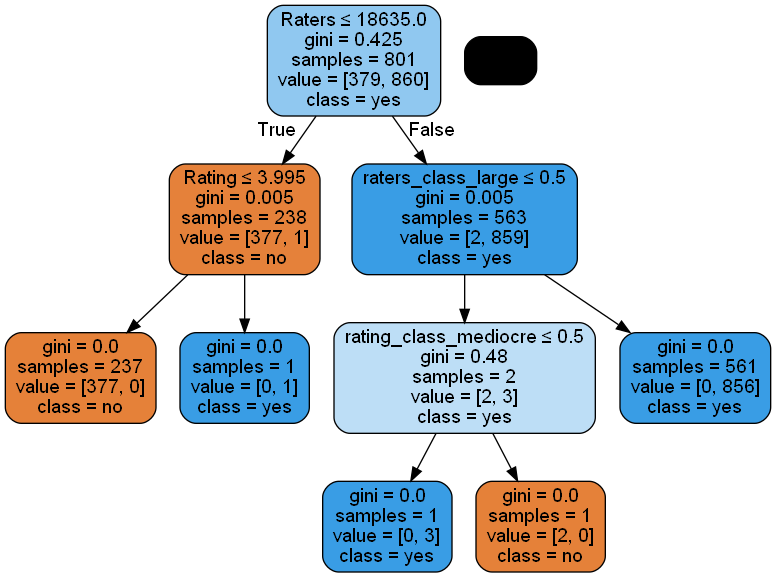

In [ ]:
estimator = rf_model.estimators_[5]

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('read_horror_rf.png')
Image(graph.create_png())